# 0. Inaugural Project: Labour Supply Problem

Imports and set magics:

In [25]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt # baseline modul
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
# local modules
import inauguralproject



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'tabulate'

## Question 1: Constructing and solve function

In the assignment, a a quasi-linear consumer utility function is  given. Naturally, the consumer wishes to maximize its utility that is given by the optimal respectively the level of consumption, c, and the labor supply, l.

This problem is going to be solved by using a solver. We have  chosen  to set w=0.8 in order to solve the model.

In [1]:

# Functions used to solve the consumer problem
# Define the utility function
def utility_f(c,l,v,e):
    utility = np.log(c)-v*(l**(1+(1/e))/(1+(1/e)))
    return utility

# Define total resources
def total_r(m,w,l,tau0,tau1,k):
    x = m+w*l-(tau0*w*l+(tau1*np.fmax(w*l-k,0)))
    return x
 
# Define and specify print solution 
def print_solution(c,l,utility):
    print(f'Optimal level of consumption is {c:.4f}')
    print(f'Optimal level of labour is {l:.4f}')
    print(f'Optimal level of utility for the consumer is {utility:.4f}')

# Set parameters
m = 1
v = 10
e = 0.3
tau0 = 0.4
tau1 = 0.1
k = 0.4
w = 0.8

We solve by the model by following these three steps: 

1. Defining an objective function with labour supply as the value of  choice. Here do we specify that consumption (c) must be equal to total ressources (x) when maximized. 

2. Calling the solver where the method 'bounded' is used since we're interested in a local minimum of the objective function within the boundries of labour supply, l ∈ (0,1). 


3. Unpacking and printing the solution. 


In [3]:
# a. Define the objective function
def value_of_choice(l,m,w,tau0,tau1,k,e,v):
    c =  total_r(m,w,l,tau0,tau1,k)
    return -utility_f(c,l,v,e)


# b. Call the solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tau0,tau1,k,e,v))

# c. Unpack and print the solution: 
l = sol_case1.x
c = total_r(m,w,l,tau0,tau1,k)
utility = utility_f(c,l,v,e)
print_solution(c,l,utility)

Optimal level of consumption is 1.1835
Optimal level of labour is 0.3823
Optimal level of utility for the consumer is 0.1327


## Question 2: Plotting the optimal level of respectively consumption and labour supply as function of the optimal wage







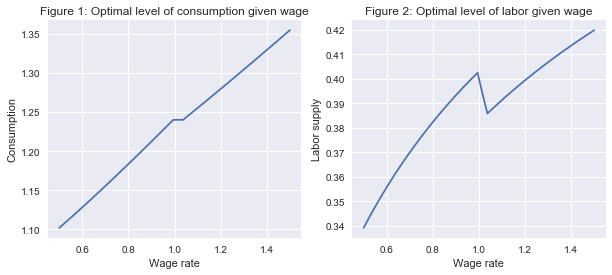

In [5]:
# Defining values
N = 10000
w_vec = np.linspace(0.5,1.5,N)
l_values = np.zeros(N)

for i, w in enumerate(w_vec): 
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tau0,tau1,k,e,v))
    l_values[i] = sol_case1.x

c_values = total_r(m,w_vec,l_values,tau0,tau1,k)

plt.style.use("seaborn")

# a. create the figure
fig = plt.figure(figsize=(10,4))

# b. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec, c_values)

ax_left.set_title('Figure 1: Optimal level of consumption given wage')
ax_left.set_xlabel('Wage rate')
ax_left.set_ylabel('Consumption')
ax_left.grid(True)

# b. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec, l_values)

ax_right.set_title('Figure 2: Optimal level of labor given wage')
ax_right.set_xlabel('Wage rate')
ax_right.set_ylabel('Labor supply')
ax_right.grid(True)

Figure 1 shows shows that consumption is increasing with the wage rate up until the wage is approx. 1. Here is the level of consumption constant because individuals set their labour supply in order to avoid top tax. When the wage increase further, it again becomes optimal to consume more when wage increases.


Figure 2 shows that consumption is increasing in the wage until the wage rate approaches 1. This means that individuals set their labour supply to stay exactly below the threshold for paying top tax, $\kappa=0.4$. When the wage increase further, it becomes optimal to increase labor supply in spite of the top tax.


## Question 3: Calculating the total tax revenue 

In order to calculate the total tax revenue we follow once again three steps:

1. Defining variables; population size (N), wage rate with a uniform distribution (w_u), labour supply (l_values) and the tax paid by the individual to the government (tax_i). 

2. Solving by calling a solver that mmaximize utility for each

In [4]:
# a. Defining variables
np.random.seed(888)
N = 10000
w_u = np.random.uniform(0.5,1.5, size=N)
l_values = np.zeros(N)
tax_i = np.zeros(N)

# b. Calling the solver for each individual
for i, w in enumerate(w_u):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tau0,tau1,k,e,v))
    l_values[i] = sol_case1.x
    tax_i = tau0*w_u*l_values+tau1*np.fmax(w_u*l_values-k,0)
    
# Calculate total tax revenue
total_tax_rev = np.sum(tax_i)
print(f'The total tax revenue is {total_tax_rev:.4f}')

The total tax revenue is 1637.5474


## Question 4: Calculating the total tax revenue with a lower elasticity  

We are now calculating the total tax revenue with a lower the Frisch elasticity of labor supply, $\epsilon=0.1$. This is done as before: 1) defining variables, 2) calling the solver for each indiidual with a wage, $w$, and lastly 3) calculating the sum of these to obtain the total revenue.



In [7]:
np.random.seed(2020)

#For every individual i, we set parameters, where epsilon is now eps = 0.1: 
e = 0.1

for i, w in enumerate(w_u):
    
    # We call the solver for ever individual i, and calculate the tax revenue from every individual: 
    sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tau0,tau1,k,e,v))
    l_values[i] = sol_case1.x
    tax_i = tau0*w_u*l_values+tau1*np.fmax(w_u*l_values-k,0)

# We calculate the total tax revenue by summing the tax revenue from every individual and print the result: 
total_tax_rev = np.sum(tax_i)
print(f'The total tax revenue is now = {total_tax_rev:.4f}')

The total tax revenue is now = 3210.0936


## Question 5: Political advice - maximal tax revenue 

In [11]:

l_values = np.zeros(N)

# Define function to print the solution
def print_solution(t0,t1,k,tt):
    print(f'tau_0 = {t0:.4f}')
    print(f'tau1 = {t1:.4f}')
    print(f'k  = {k:.4f}')
    print(f'The total tax revenue = {tt:.4f}')


### 1. Calculating maximal revenue when $\epsilon = 0.3$

In [12]:

# a. Define total tax function, which returns the total tax revenue
def total_taxes(m,v,tau0,tau1,k,e,w_u,l_values):

    # Solve the consumer problem for each individual and calculate tax revenue from each individual
    for i,w in enumerate(w_u):
        sol_case1 = optimize.minimize_scalar(
            value_of_choice,method='bounded',
            bounds=(0,1),args=(m,w,tau0,tau1,k,e,v))
        l_values[i] = sol_case1.x
        tax_i = tau0*w_u*l_values+tau1*np.fmax(w_u*l_values-k,0)

    # total tax revenue    
    total_tax = np.sum(tax_i)

    return total_tax

   



In [13]:
 # b. Define the objective function where epsilon = 0.3
def value_of_choice2(x,w_u,l_values):
    tau0 = x[0]
    tau1 = x[1]
    k = x[2]
    return -total_taxes(1,10,tau0,tau1,k,0.3,w_u,l_values)

# c. Bounds of the variables and an initial guess
bounds = ((0,1),(0,1),(0,1))
initial_guess = [0.5,0.5,0.5]

# d. Call solver
sol_case2 = optimize.minimize(
    value_of_choice2,initial_guess,args=(w_u,l_values),
    method='SLSQP',bounds=bounds)

# e. Unpack the solution
tau0 = sol_case2.x[0]
tau1 = sol_case2.x[1]
k = sol_case2.x[2]
total_t = total_taxes(1,10,tau0,tau1,k,0.3,w_u,l_values)

# Print the solution
print_solution(tau0,tau1,k,total_t)

$	au_0$ = 0.7855
tau1 = 0.3376
k  = 0.5952
The total tax revenue = 2477.6922


### 2. Calculating maximal revenue when $\epsilon = 0.1$

In [10]:
# b. Define the objective function where epsilon = 0.1
def value_of_choice2(x,w_u,l_values):
    tau0 = x[0]
    tau1 = x[1]
    k = x[2]
    return -total_taxes(1,10,tau0,tau1,k,0.1,w_u,l_values)

# c. Bounds of the variables and an initial guess
bounds = ((0,1),(0,1),(0,1))
initial_guess = [0.5,0.5,0.5]

# d. Call solver
sol_case2 = optimize.minimize(
    value_of_choice2,initial_guess,args=(w_u,l_values),
    method='SLSQP',bounds=bounds)

# e. Unpack the solution
tau0 = sol_case2.x[0]
tau1 = sol_case2.x[1]
k = sol_case2.x[2]
tt = total_taxes(1,10,tau0,tau1,k,0.1,w_u,l_values)

# Print the solution
print_solution(tau0,tau1,k,tt)

tau0 = 0.9143
tau1 = 0.8953
k  = 0.8776
The total tax revenue = 5647.1661


In [33]:
#from tabulate import tabulate
#print(tabulate([['Tau0', 0.7855, 0.9143], ['Tau1', 0.3376, 0.8953], ['k', 0.5952, 0.8776], ['Total Tax Rev', 2477.6922, 5647.1661]], headers=['','$\epsilon=0.3$', '$\epsilon=0.1$', ]))

### 3. Conclusion

In the case where $\epsilon =0.3$, we found that the policy that maxes the total tax revenue consists of a standard labour income tax of $\tau_0=0,7855$, a top bracket labor income tax $\tau_1=0,3376$ and a cut-off value for the top labor income bracket of $\kappa=0,5952$. This yields a total tax revenue of 2477.6922. 

When lowering the Frisch elasticity of labor supply to $\epsilon =0.1$, the maximal tax revenues is 5647.1661 yielding from a standard labour income tax of $\tau_0=0,9143$, a top bracket labor income tax $\tau_1=0,8953$ and a cut-off value for the top labor income bracket of $\kappa=0,8776$.

We can conclude that the lower the Frisch elasticity of labor supply the less the individual respond to tax changes, resulting in higher tax revenue, since the government can increase the tax rate without individuals decrease their labour supply. 

